In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
file_path = "nike_products_with_features.csv"
df = pd.read_csv(file_path)

df_numeric = df.select_dtypes(include=[np.number])

In [3]:
df_numeric

,Price,Initial Price,Discount (%),Discount Amount,Discount Flag,Price Category,Color Diversity Score,Is Just In,Is Best Seller,Is Coming Soon,Is Member Product,Is Sustainable Materials,Is Launching in SNKRS,Is Sold Out,Is Available in SNKRS,Is Customize,Title Word Count,Subtitle Word Count,Marketing Appeal Score,Sale Quantity
0,100.0,100,0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,8,69
1,100.0,100,0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,9,810
2,100.0,100,0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,2,10,421
3,100.0,100,0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,9,61
4,100.0,100,0,0.0,0,1,4,0,0,0,0,0,0,0,0,0,2,1,4,995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,40.0,40,0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,4,2,8,864
2705,40.0,40,0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,5,2,2,590
2706,40.0,40,0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,4,2,10,508
2707,40.0,40,0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,5,2,7,895


In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [5]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

In [6]:
print(f"Number of Principal Components: {df_pca.shape[1]}")

Number of Principal Components: 15


In [7]:
def compute_gap_statistic(data, k_max=10, n_refs=10):
    gaps = np.zeros(k_max)
    ref_disps = np.zeros(k_max)

    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        disp = sum(np.min(pairwise_distances(data, kmeans.cluster_centers_), axis=1))

        # Generate random reference datasets
        ref_disps_k = np.zeros(n_refs)
        for i in range(n_refs):
            random_data = np.random.uniform(np.min(data, axis=0), np.max(data, axis=0), data.shape)
            kmeans.fit(random_data)
            ref_disps_k[i] = sum(np.min(pairwise_distances(random_data, kmeans.cluster_centers_), axis=1))

        gaps[k - 1] = np.log(np.mean(ref_disps_k)) - np.log(disp)
    
    optimal_k = np.argmax(gaps) + 1  # Best k corresponds to the max gap
    return gaps, optimal_k

c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Optimal k (Gap Statistics): 10


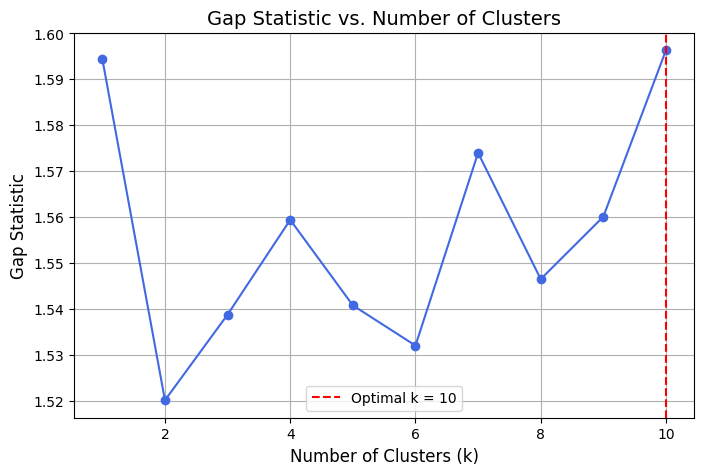

In [8]:
gaps, optimal_k_gap = compute_gap_statistic(df_pca, k_max=10, n_refs=10)
print(f"Optimal k (Gap Statistics): {optimal_k_gap}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), gaps, marker="o", linestyle="-", color="royalblue")
plt.axvline(optimal_k_gap, linestyle="--", color="red", label=f"Optimal k = {optimal_k_gap}")
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Gap Statistic", fontsize=12)
plt.title("Gap Statistic vs. Number of Clusters", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [9]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

optimal_k_elbow = np.argmax(np.diff(inertia)) + 2  
print(f"Optimal k (Elbow Method): {optimal_k_elbow}")

c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Optimal k (Elbow Method): 7


c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


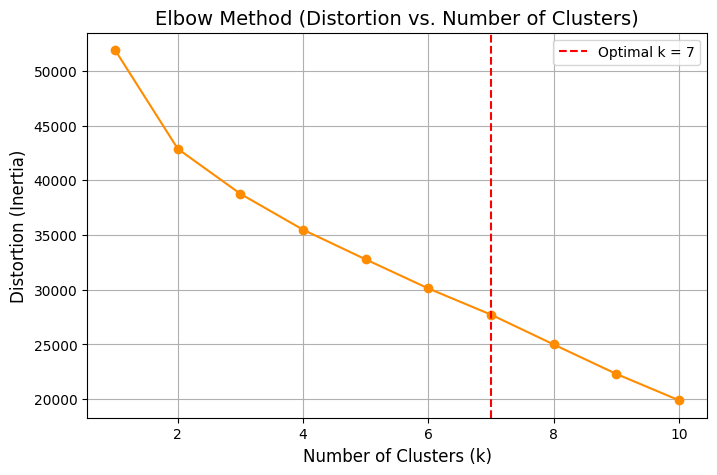

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="-", color="darkorange")
plt.axvline(optimal_k_elbow, linestyle="--", color="red", label=f"Optimal k = {optimal_k_elbow}")
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Distortion (Inertia)", fontsize=12)
plt.title("Elbow Method (Distortion vs. Number of Clusters)", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [11]:
final_k = optimal_k_gap
kmeans = KMeans(n_clusters=final_k, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(df_pca)

c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


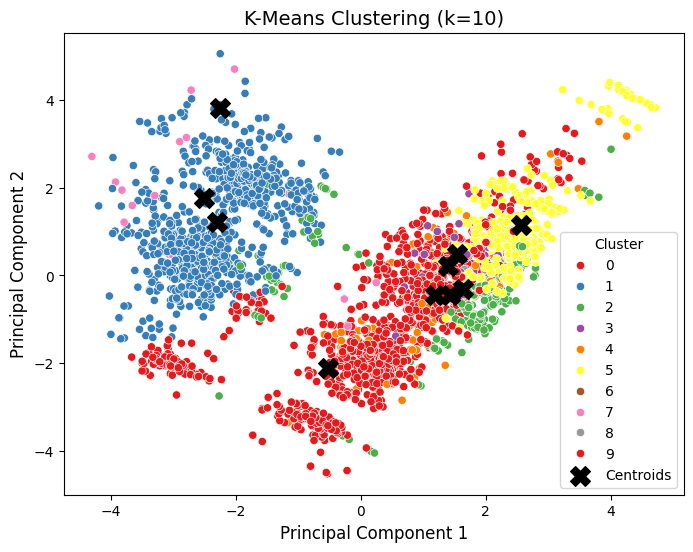

c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


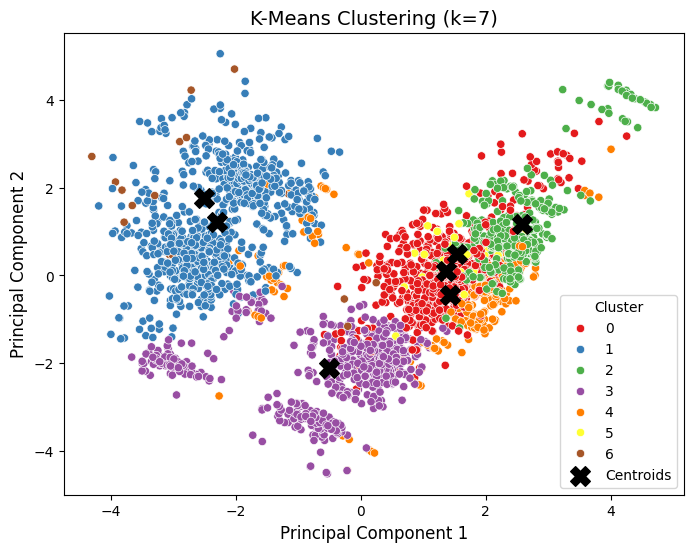

c:\Users\khole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


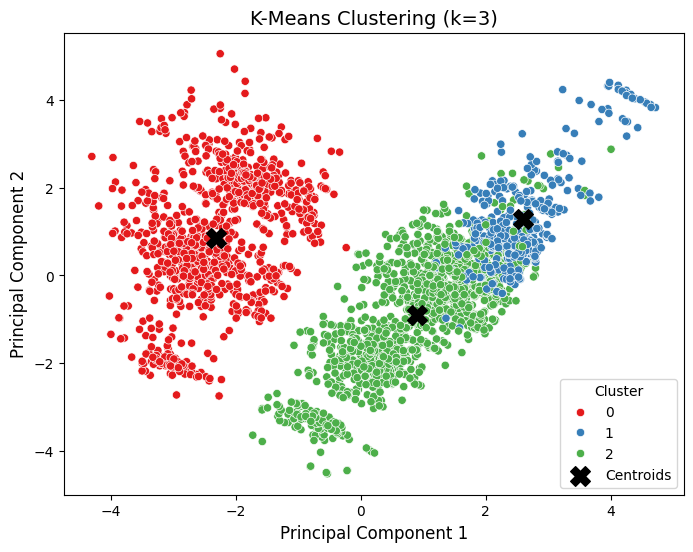

In [12]:
def plot_kmeans(k, df_pca):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=df_pca[:, 0], 
        y=df_pca[:, 1], 
        hue=cluster_labels, 
        palette="Set1", 
        legend=True
    )
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1], 
        s=200, c='black', marker='X', label="Centroids"
    )
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.title(f"K-Means Clustering (k={k})", fontsize=14)
    plt.legend(title="Cluster")
    plt.show()

# 6️⃣ Generate K-Means Plots for 3 Cluster Values
for k in [optimal_k_gap, 7, 3]:  # Optimal k, k=7, k=3
    plot_kmeans(k, df_pca)

In [13]:
sample_size = 500  
df_sample = df_pca[np.random.choice(df_pca.shape[0], sample_size, replace=False)]

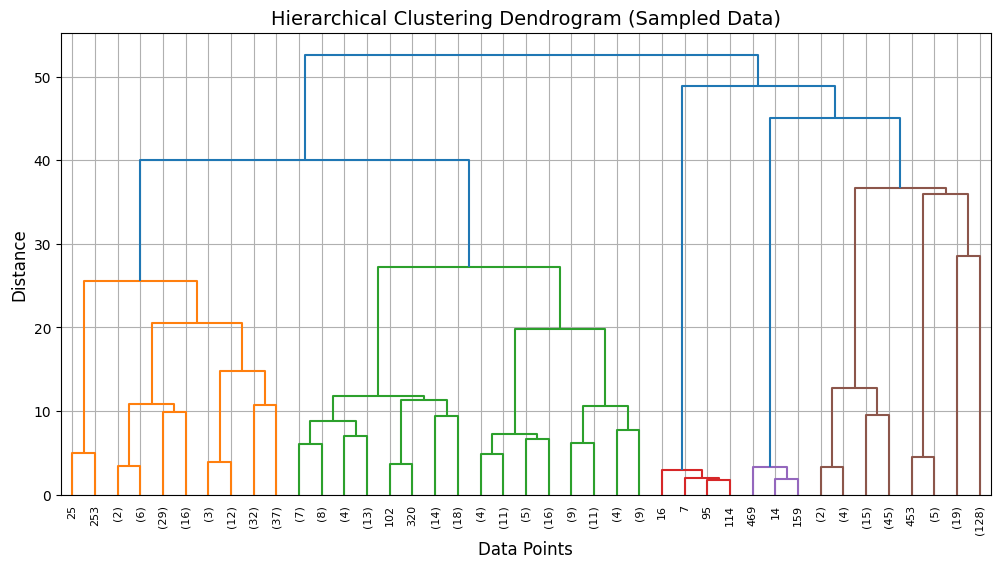

In [15]:
linkage_matrix = linkage(df_sample, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)  # Show 5 levels for clarity
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid()
plt.show()

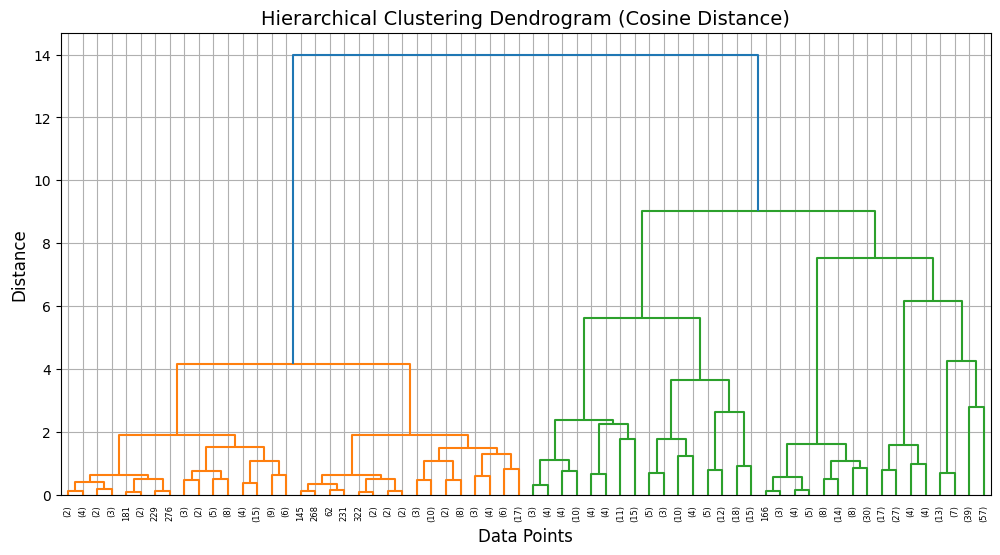

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv(file_path)
df_numeric = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)


sample_size = 500 
df_sample = df_pca[np.random.choice(df_pca.shape[0], sample_size, replace=False)]


cosine_distances = pdist(df_sample, metric='cosine')

linkage_matrix_cosine = linkage(cosine_distances, method="ward")


plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_cosine, truncate_mode="level", p=5) 
plt.title("Hierarchical Clustering Dendrogram (Cosine Distance)", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid()
plt.show()

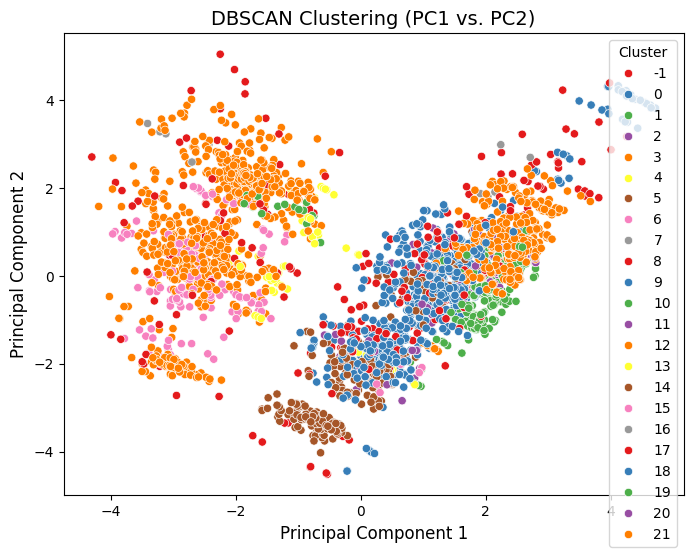

In [20]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels_dbscan, palette="Set1", legend=True)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("DBSCAN Clustering (PC1 vs. PC2)", fontsize=14)
plt.legend(title="Cluster")
plt.show()
